In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
mnist = pd.read_csv('train.csv')

In [3]:
mnist.shape

(42000, 785)

In [4]:
mnist.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
x= mnist.drop('label', axis=1)
y= mnist.label

In [6]:
ks = range(1,21)
inertias = []

for k in ks:
    #Define the model
    model = KMeans(n_clusters=k, random_state=42)
    #fit the model
    model.fit(x)
    #append the inertia
    inertias.append(model.inertia_)

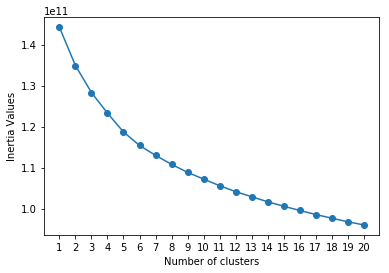

In [7]:
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.xticks(ks)
plt.show()

In [8]:
model = KMeans(n_clusters=10,random_state=122)

In [9]:
label = model.fit_predict(x)

In [10]:
pd.crosstab(y,label)

col_0,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,117,1,8,24,1713,127,1984,138,11,9
1,8,2651,4,6,0,5,0,4,2003,3
2,112,237,48,124,71,143,9,231,290,2912
3,761,286,34,122,89,43,11,2786,68,151
4,13,94,1293,2281,8,130,10,0,216,27
5,1073,111,246,241,169,73,49,1250,571,12
6,63,190,2,54,98,3414,84,19,164,49
7,6,212,2603,1312,9,5,9,4,210,31
8,2452,176,128,126,26,35,26,765,295,34


In [11]:
from sklearn.metrics import accuracy_score

8.114285714285714

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123)

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predy= logreg.predict(x_test)

In [20]:
accuracy_score(y_test,predy)

0.9018095238095238

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=123)
rf = RandomForestClassifier(criterion='entropy', random_state=123)

In [23]:
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [24]:
dtpred = dt.predict(x_test)
rfpred = rf.predict(x_test)

In [25]:
accuracy_score(y_test, dtpred)

0.8621904761904762

In [26]:
accuracy_score(y_test, rfpred)

0.9396190476190476

# Dimension Reduction

In [29]:
wine = pd.read_csv('wineQualityReds.csv', index_col=0)

In [30]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
wine.shape

(1599, 12)

In [34]:
wine['Outcome'] = np.where(wine.quality>5,1,0)

In [37]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Outcome
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [38]:
x= wine.drop(['quality','Outcome'], axis=1)
y= wine.Outcome

In [40]:
#find train and test

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123,test_size=0.20)

In [41]:
#Apply scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [42]:
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
winelogreg = LogisticRegression()

In [44]:
winelogreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
predy=winelogreg.predict(x_test)

In [46]:
accuracy_score(y_test,predy)

0.703125

In [48]:
x_train

array([[ 0.89358298, -1.13946293,  1.48264243, ..., -1.03607885,
         0.40597574,  0.93295636],
       [-0.53104385,  0.86341667, -0.57810487, ...,  1.23111916,
         0.23188892, -0.47443764],
       [ 1.91931429, -0.19365867,  1.12201165, ..., -0.7769705 ,
        -1.33489252, -1.13122151],
       ...,
       [-0.07516327, -1.58454728,  0.34923141, ..., -0.58263925,
         1.62458353,  0.46382503],
       [-0.92993936, -0.24929422, -1.29936643, ..., -1.35996428,
        -0.7546031 , -0.66209018],
       [-0.98692444,  0.19579014, -0.68114224, ...,  0.71290247,
        -0.23234262,  1.21443516]])

In [51]:
#Apply PCA

from sklearn.decomposition import PCA
pc = PCA(n_components=None)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test) 

In [52]:
expvariance = pc.explained_variance_
expvariance

array([3.12221635, 1.91602227, 1.57857627, 1.19598556, 0.9517511 ,
       0.65966128, 0.57393515, 0.42663951, 0.34273439, 0.18259929,
       0.05848602])

In [60]:
pc.explained_variance_ratio_

array([0.28361593, 0.17404766, 0.14339473, 0.10864095, 0.08645518,
       0.05992232, 0.05213513, 0.03875508, 0.03113331, 0.01658696,
       0.00531275])

In [108]:
wine = pd.read_csv('Wine.csv')

In [109]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [110]:
x= wine.drop('Customer_Segment', axis=1)
y= wine.Customer_Segment

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123,test_size=0.20)

x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

winelogreg = LogisticRegression()
winelogreg.fit(x_train,y_train)

winerf = RandomForestClassifier(random_state=122)
winerf.fit(x_train,y_train)

predy=winelogreg.predict(x_test)
predrf = winerf.predict(x_test)

acc1 = accuracy_score(y_test,predy)
acc2 = accuracy_score(y_test,predrf)
print(acc1,'\n\n',acc2)

0.9722222222222222 

 0.9444444444444444


In [111]:
from sklearn.decomposition import PCA
pc = PCA(n_components=3)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test) 

winelogreg = LogisticRegression()
winelogreg.fit(x_train,y_train)

winerf = RandomForestClassifier(random_state=122)
winerf.fit(x_train,y_train)

predy=winelogreg.predict(x_test)
predrf = winerf.predict(x_test)

acc1 = accuracy_score(y_test,predy)
acc2 = accuracy_score(y_test,predrf)
print(acc1,'\n\n',acc2)

0.9444444444444444 

 0.9444444444444444


In [99]:
pc.explained_variance_ratio_

array([0.35548752, 0.20297889, 0.11398818])